# Pymaceuticals Inc.
---

### Analysis

- Weight vs. Tumor Volume Relationship: The scatter plot analysis revealed a positive correlation between mouse weight and average tumor volume in the Capomulin regimen. As the weight increased, the tumor volume tended to be higher as well.

- Analysis of Tumor Volume Over Time: The line plot analysis for a specific mouse treated with Capomulin demonstrated a downward trend in tumor volume throughout the treatment period. This suggests that Capomulin exhibits effectiveness in reducing tumor size and inhibiting its growth.

- Comparison of Treatment Regimens: The box plot analysis revealed that both Capomulin and Ramicane exhibited lower median tumor volumes in comparison to Infubinol and Ceftamin. This observation suggests that Capomulin and Ramicane treatments may be more effective in reducing tumor size compared to the other regimens.

     The analysis offers valuable insights into the effectiveness of diverse treatment regimens and the correlations among tumor volume, mouse weight, and timepoint. These conclusions can provide researchers with informed guidance for future studies and clinical trials, aiding in decision-making processes.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_metadata["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# Retrieve the data types of the DataFrame
duplicate_mouse_id_dtype = study_data_complete["Mouse ID"].dtypes

duplicate_mouse_id_dtype
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


# Group the data by 'Drug Regimen'
regimen_group = clean_study_data_complete.groupby('Drug Regimen')

# Calculate the mean of tumor volume for each regimen
mean_tumor_volume = regimen_group['Tumor Volume (mm3)'].mean()

# Calculate the median of tumor volume for each regimen
median_tumor_volume = regimen_group['Tumor Volume (mm3)'].median()

# Calculate the variance of tumor volume for each regimen
variance_tumor_volume = regimen_group['Tumor Volume (mm3)'].var()

# Calculate the standard deviation of tumor volume for each regimen
std_dev_tumor_volume = regimen_group['Tumor Volume (mm3)'].std()

# Calculate the SEM (Standard Error of the Mean) of tumor volume for each regimen
sem_tumor_volume = regimen_group['Tumor Volume (mm3)'].sem()

# Create a summary DataFrame
summary_stats_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
    
})

# Display the summary statistics table
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# You can move index back into a column by doing this:
# summary_stats_df = summary_stats_df.reset_index()
# summary_stats_df = summary_stats_df.drop(columns=["index"])
# summary_stats_df

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = clean_study_data_complete.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

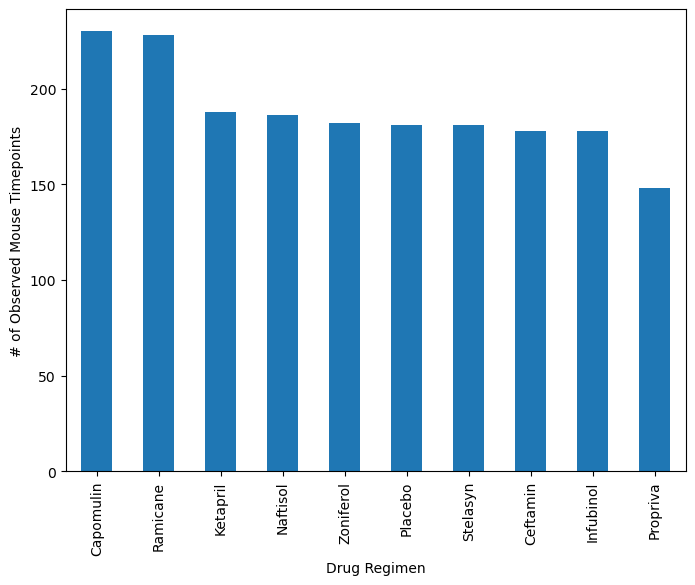

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_study_data_complete.groupby('Drug Regimen').size()

# Sort the counts in descending order
regimen_sorted = regimen_counts.sort_values(ascending=False)

# Create a bar plot
regimen_sorted.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

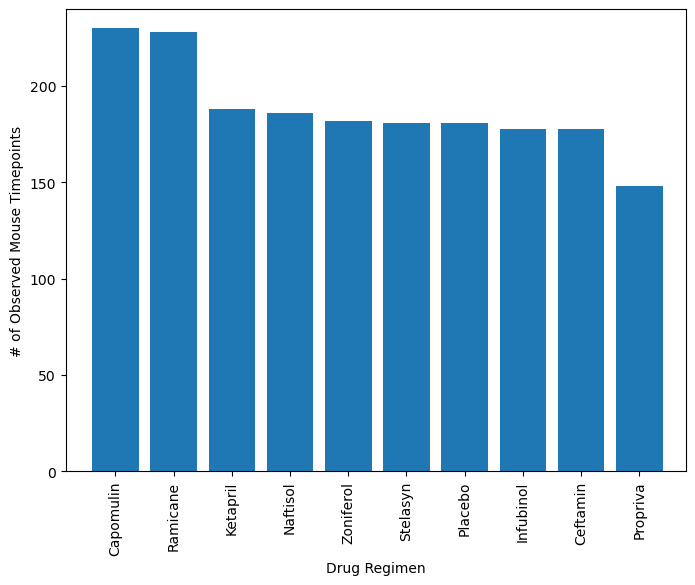

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate the counts of rows for each drug regimen
regimen_counts = clean_study_data_complete['Drug Regimen'].value_counts()

# Create a list of drug regimens and counts
regimens = regimen_counts.index
counts = regimen_counts.values

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar plot
plt.bar(regimens, counts, alpha=1, align='center')

# Set x and y limits
plt.xlim(-.85, len(regimens)-.20)
plt.ylim(0, max(counts) + 10)

# Set axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis tick labels vertically
plt.xticks(rotation='vertical')
plt.show()

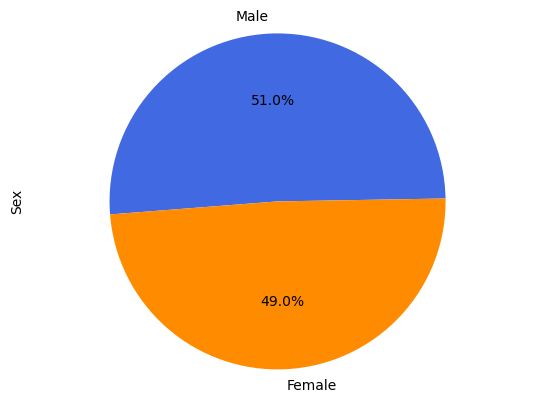

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the counts of female and male mice
gender_counts = clean_study_data_complete['Sex'].value_counts()

# Create a pie plot using Pandas
gender_counts.plot(kind='pie', labels=['Male', 'Female'], colors=['royalblue', 'darkorange'], autopct="%1.1f%%",
                   shadow=False, startangle=1)

# Set the aspect ratio to make it a circle
plt.axis('equal')

# Display the pie plot
plt.show()

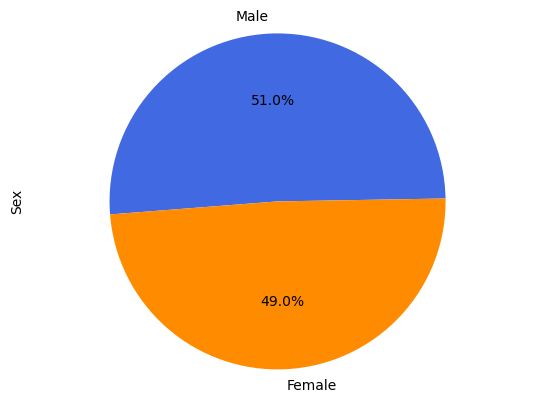

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate the counts of female and male mice
gender_counts = clean_study_data_complete['Sex'].value_counts()

# Specify the labels and sizes for the pie plot
labels = ['Male', 'Female']
sizes = gender_counts.values
colors = ['royalblue', 'darkorange']

# Create the pie plot using pyplot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=1)

# Set label
plt.ylabel('Sex')

# Set the aspect ratio to make it a circle
plt.axis('equal')

# Display the pie plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max()

greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_greatest_timepoint = pd.merge(greatest_timepoint, clean_study_data_complete, how="left", on=["Mouse ID","Timepoint"])
tumor_vol_greatest_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = tumor_vol_greatest_timepoint.loc[tumor_vol_greatest_timepoint["Drug Regimen"] == x, "Tumor Volume (mm3)"]

    # add subset 
    tumor_volume.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{x}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


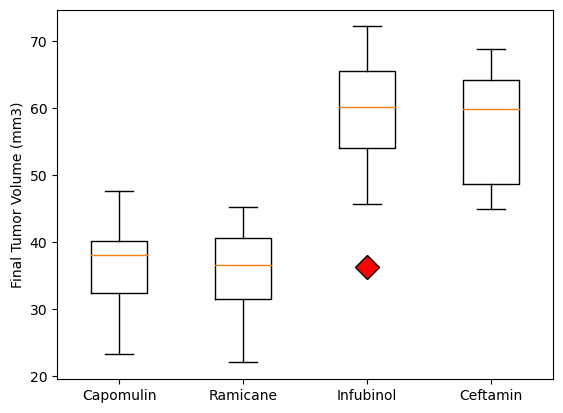

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
fig, ax = plt.subplots()

# Extract the tumor volume data for each treatment group
tumor_volume_data = [tumor_vol_greatest_timepoint.loc[tumor_vol_greatest_timepoint["Drug Regimen"] == treatment, "Tumor Volume (mm3)"] 

for treatment in treatment_list]

# Create the boxplot
ax.boxplot(tumor_volume_data, labels=treatment_list, flierprops={'marker': 'D', 'markerfacecolor': 'red', 'markersize': 12})

# Set the label
ax.set_ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

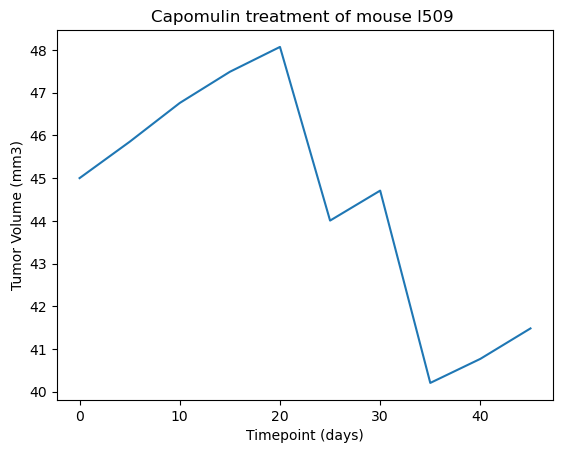

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]

mouse_id = 'l509'
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID']== mouse_id]

plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])

# Extract the tumor volume and time point data

tumor_volume = mouse_data["Tumor Volume (mm3)"]
time_point = mouse_data["Timepoint"]

# Set the title and labels

plt.title(f"Capomulin treatment of mouse {mouse_id} ")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the line plot
plt.show()

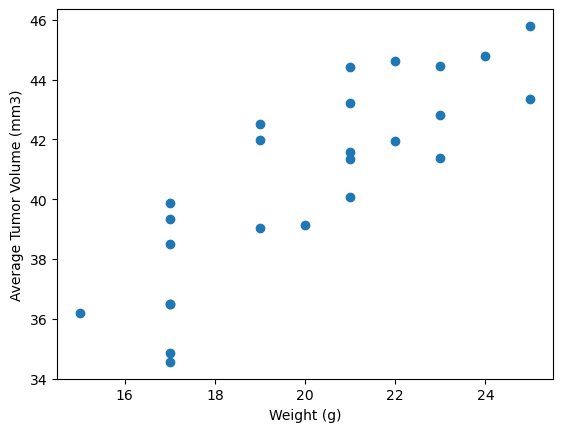

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_vs_tumor_vol = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]

# Extract the weight and tumor volume data
mouse_weight = weight_vs_tumor_vol.groupby("Mouse ID")["Weight (g)"].unique()
average_tumor_volume = weight_vs_tumor_vol.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)

# Set the labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the scatter plot
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(average_weight, average_tumor_volume)[0],2)}")


# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(average_weight, average_tumor_volume)

# Perform linear regression
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(average_weight, average_tumor_volume)

# Create the regression line
regression_line = pe_slope * average_weight + pe_int

# Generate the scatter plot and regression line
plt.scatter(average_weight, average_tumor_volume)
plt.plot(average_weight, regression_line, "--", color='red')

# Set the labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


NameError: name 'average_weight' is not defined